In [1]:
import pandas as pd
import numpy as np
import os, sys, subprocess
import h5py
import json
import matplotlib.pyplot as plt

C:\Users\Jay\Miniconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#import data from Sastry et. al. 
DATA_DIR = '../dataframes/'

DF_prest = pd.concat([pd.read_csv(DATA_DIR+'DF_prest_features_1.csv',index_col=0),
                      pd.read_csv(DATA_DIR+'DF_prest_features_2.csv',index_col=0),
                      pd.read_csv(DATA_DIR+'DF_prest_features_3.csv',index_col=0),
                      pd.read_csv(DATA_DIR+'DF_prest_features_4.csv',index_col=0)])
print ('Number of peptides:', len(DF_prest))


Number of peptides: 45206


In [4]:
DF_prest.head(5)

,prest_id,uniprot_id,conc_cf,aa_seq,nt_seq,aa_len,true_nt_seq,AAA,AAT,AAC,...,disembl_HOTLOOPS_frac,ronn_avg,ronn_results,ronn_frac,disopred_results,disopred_avg,disopred_pb_results,disopred_pb_avg,disopred_frac,disopred_pb_frac
0,140095,G3V3N0,4.3075,IMTAPSSFEQFKVAMNYLQLYNVPDCLEDIQDADCSSSKCSSSASS...,GACAAGCTTGCGGCCGCAATTATGACAGCTCCCTCCAGTTTTGAGC...,139,ATTATGACAGCTCCCTCCAGTTTTGAGCAGTTTAAAGTGGCAATGA...,0.057554,0.043165,0.021583,...,0.410072,0.495827,imtapssfeqfkvamnylqlynvpdclediqDADCSSSKCSSSASS...,0.482014,ImtapssfeqfkvamnylqlynvpdclediqdadcsSSKCSSSASS...,0.387050,-...................................^^^^^^^^^^...,0.317770,0.388489,0.359712
1,140099,G3V537,2.9154,TYYAWKHELLGSGTCPALPPREVLGMEELEKLPEEQVAEEELECSA...,GACAAGCTTGCGGCCGCAACCTACTATGCCTGGAAGCATGAGCTGC...,144,ACCTACTATGCCTGGAAGCATGAGCTGCTGGGCTCTGGCACCTGCC...,0.006944,0.013889,0.013889,...,0.388889,0.488125,tyyawkhellGSGTcPALPPREVLGMEELEKLPEEQVAEEELECSa...,0.493056,tyyawkhellgsgtCPALPPREVLGMEELEKLPEEQVAEEELECSA...,0.421597,..............^^^^^^--^^^^^^^^^^^^^^^^^^^-^^^^...,0.352917,0.465278,0.423611
2,140225,P12724,1.4877,SLHARPPQFTRAQWFAIQHISLNPPRCTIAMRAINNYRWRCKNQNT...,GACAAGCTTGCGGCCGCATCACTCCATGCCAGACCCCCACAGTTTA...,136,TCACTCCATGCCAGACCCCCACAGTTTACGAGGGCTCAGTGGTTTG...,0.007353,0.051471,0.058824,...,0.338235,0.368750,SLharppqftraqwfaiqhislnpprctiamrainnyrwrcknqnt...,0.058824,slharppqftraqwfaiqhislnpprctiamrainnyrwrcknqnt...,0.034338,.................................................,0.000000,0.000000,0.000000
3,140235,H0YH02,6.7224,ARALNESKRVNNGNTAPEDSSPAKKTRRCQRQESKKMPVAGGKANK...,GACAAGCTTGCGGCCGCAGCGAGAGCATTAAATGAAAGCAAAAGAG...,123,GCGAGAGCATTAAATGAAAGCAAAAGAGTTAATAATGGCAACACGG...,0.040650,0.056911,0.040650,...,0.552846,0.571382,ARALNESKRVNNGNTAPEDSSPAKKTRRCQRQESKKMPVAGGKANK...,0.536585,ARALNESKRVNNGNTAPEDSSPAKKTRRCQRQESKKMPVAGGKANK...,0.425366,^^^^^^^^^^^^^^^-^---^-^^^^^^^^^^^^^--^^^^^^^^^...,0.295122,0.430894,0.373984
4,140309,F5GYC5,3.3848,HRKEPGARLEATRGAARPHKQGTKPMITRPSVSQLGEGKCPSSQHL...,GACAAGCTTGCGGCCGCACATCGGAAAGAGCCTGGGGCAAGGCTGG...,124,CATCGGAAAGAGCCTGGGGCAAGGCTGGAGGCCACAAGAGGAGCTG...,0.032258,0.008065,0.008065,...,0.274194,0.556613,HRKEPGARLEATRGAARPHKQGTKPMITRPSVSQLGEGKCPSSQHL...,0.620968,HRKEPGARLEATRGAARPHKQGTkpmitrpsvsqlgegkcpssqhl...,0.236613,^^^^^^^^^^^^^^^^^^^^^^^^.........................,0.185726,0.201613,0.209677


In [3]:
#Break 'true_nt_seq' into codons
def nt_seq_to_list(nt_sequence):
    return np.array(list(map(''.join, zip(*[iter(str(nt_sequence))]*3))))

DF_prest['codon_array'] = DF_prest['true_nt_seq'].apply(nt_seq_to_list)

In [4]:
DF_prest['codon_array'][0]

array(['ATT', 'ATG', 'ACA', 'GCT', 'CCC', 'TCC', 'AGT', 'TTT', 'GAG',
       'CAG', 'TTT', 'AAA', 'GTG', 'GCA', 'ATG', 'AAC', 'TAC', 'CTA',
       'CAG', 'CTA', 'TAC', 'AAT', 'GTT', 'CCT', 'GAC', 'TGT', 'TTA',
       'GAA', 'GAC', 'ATC', 'CAG', 'GAT', 'GCA', 'GAT', 'TGT', 'TCT',
       'AGT', 'TCA', 'AAA', 'TGT', 'TCC', 'TCT', 'TCT', 'GCT', 'TCC',
       'AGC', 'AAA', 'CAG', 'AAC', 'AGC', 'AAA', 'ATG', 'ATA', 'TTT',
       'GGG', 'GTA', 'AGA', 'ATG', 'TAT', 'GAA', 'GAT', 'ACT', 'GTG',
       'GCT', 'CGA', 'AAT', 'GGC', 'AAT', 'GAA', 'GCC', 'AAC', 'AGG',
       'TGG', 'TGT', 'GCA', 'GAG', 'CCA', 'AGT', 'TCA', 'ACG', 'GTA',
       'AAT', 'ACA', 'CCA', 'CAT', 'AAT', 'AGA', 'GAG', 'GCT', 'GAT',
       'GAA', 'GAG', 'TCT', 'TTA', 'CAA', 'TTA', 'GGT', 'AAT', 'TTT',
       'CCT', 'GAG', 'CCA', 'CTA', 'TTT', 'GAT', 'GTA', 'TGT', 'AAA',
       'AAA', 'AGT', 'TCC', 'GTG', 'TCC', 'AAA', 'TTA', 'TCT', 'ACT',
       'CCA', 'AAA', 'GAA', 'CGT', 'GTG', 'TCA', 'AGA', 'CGC', 'TTT',
       'GGG', 'CGG',

In [5]:
#Check the data for sequence that are not divisible by 3
weird_seq_len = []
for idx, row in DF_prest.iterrows():
    if len(str(row['true_nt_seq']))%3:
        weird_seq_len.append(idx)
print(weird_seq_len)


[]


#### No sequences with wrong length in the dataset

In [8]:
with open('../josh/codon_colors.json', 'r') as fp:
    codon_colors = json.load(fp)

In [9]:
codon_list = ['AAA', 'AAT', 'AAC', 'AAG', 'ATA', 'ATT', 'ATC', 'ATG', 'ACA', 'ACT',
              'ACC', 'ACG', 'AGA', 'AGT', 'AGC', 'AGG', 'TAA', 'TAT', 'TAC', 'TAG',
              'TTA', 'TTT', 'TTC', 'TTG', 'TCA', 'TCT', 'TCC', 'TCG', 'TGA', 'TGT',
              'TGC', 'TGG', 'CAA', 'CAT', 'CAC', 'CAG', 'CTA', 'CTT', 'CTC', 'CTG',
              'CCA', 'CCT', 'CCC', 'CCG', 'CGA', 'CGT', 'CGC', 'CGG', 'GAA', 'GAT',
              'GAC', 'GAG', 'GTA', 'GTT', 'GTC', 'GTG', 'GCA', 'GCT', 'GCC', 'GCG',
              'GGA', 'GGT', 'GGC', 'GGG']

In [10]:
def list_to_color_matrix(codon_array):
    # mark for garbage if codon_array is nan
    if str(codon_array[0]) == 'nan':
        return

    # otherwise return color matrix
    color_matrix = np.ndarray(shape=(len(codon_array), 4))
    for idx, codon in enumerate(codon_array):
        color_matrix[idx] = np.array(codon_colors[codon])
        
    return color_matrix

In [11]:
#apply this to the codon list
codon_list_colors = list_to_color_matrix(codon_list)

In [12]:
barcode = codon_list_colors.reshape(1, len(codon_list_colors), 4)

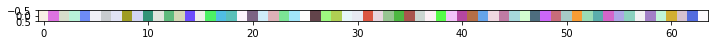

In [13]:
plt.figure(figsize=(12, 8))
plt.imshow(barcode, interpolation='nearest')
plt.show()

In [14]:
DF_prest['color_matrix'] = DF_prest['codon_array'].apply(list_to_color_matrix)

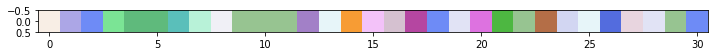

In [15]:
# show sequence barcode (chose row 45000 since it's short and the visualization is better)
barcode = DF_prest['color_matrix'][45000].reshape(1, len(DF_prest['color_matrix'][45000]), 4)

plt.figure(figsize=(12, 8))
plt.imshow(barcode)
plt.show()

# One hot encoding

In [23]:
#load the dictionary with one hot encoding
with open('../josh/codon_one_hot.json', 'r') as fp:
    codon_one_hot = json.load(fp)

In [24]:
codon_one_hot

{'AAA': [1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'AAC': [0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'AAG': [0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.

In [17]:
def list_to_one_hot_matrix(codon_array):
    # mark for garbage if codon_array is nan
    if str(codon_array[0]) == 'nan':
        return

    # otherwise return color matrix
    one_hot_matrix = np.ndarray(shape=(len(codon_array), 64))
    for idx, codon in enumerate(codon_array):
        one_hot_matrix[idx] = np.array(codon_one_hot[codon])
        
    return one_hot_matrix

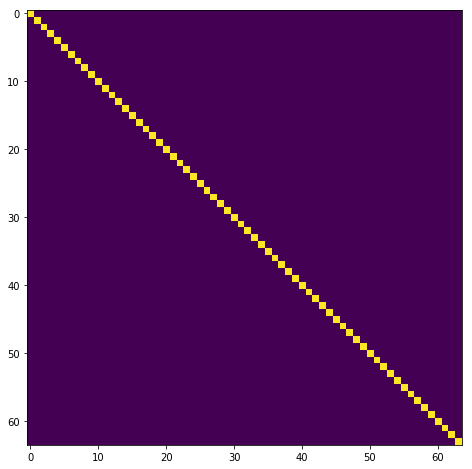

In [30]:
#looks like condon one hot values were assigned alphabetically
one_hot = list_to_one_hot_matrix(sorted(codon_list))
plt.figure(figsize=(12, 8))
plt.imshow(one_hot)
plt.show()

In [26]:
DF_prest['one_hot_matrix'] = DF_prest['codon_array'].apply(list_to_one_hot_matrix)

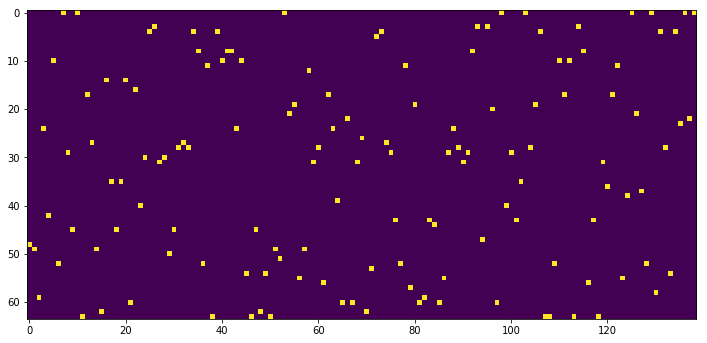

In [28]:
# show sequence one hot encoding
one_hot = DF_prest['one_hot_matrix'][0]
plt.figure(figsize=(12, 8))
plt.imshow(np.rot90(one_hot))
plt.show()

# One hot encoding of AA sequence

In [7]:
# list of amino acid single letter abbreviations from https://en.wikipedia.org/wiki/Amino_acid
aa_list = ['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']

Make a dictionary for the encoding (with abbreviations sorted in alpabetical order)

In [34]:
aa_list.sort() # sort the aa_list alphabetically 

# create a dictionary
aa_one_hot = {}
for idx, aa in enumerate(aa_list): 
    one_hot = np.zeros(len(aa_list))
    one_hot[idx] = 1
    aa_one_hot[aa] = list(one_hot)  

In order to avoid the need to pad the data later we will make all one hot encodings the same length

In [73]:
max(DF_prest['aa_len'])

149

In [75]:
def aa_to_one_hot_matrix(aa_seq):
    
    one_hot_matrix = np.zeros([149, 20]) # maximum aa_seq length X number of amino acids 
    for idx, aa in enumerate(aa_seq):
        one_hot_matrix[idx] = np.array(aa_one_hot[aa])
        
    return one_hot_matrix

Make a new dataframe that only has the info needed for the one hot encoding and apply the encoding function to the entire dataset

In [88]:
df_aa_one_hot = pd.DataFrame()
df_aa_one_hot['prest_id'] = DF_prest['prest_id']
df_aa_one_hot['conc_cf'] = DF_prest['conc_cf']
df_aa_one_hot['aa_one_hot'] = DF_prest['aa_seq'].apply(aa_to_one_hot_matrix)

Vizulaize an example sequence.  Note that the right hand side is empty (this is padding so all data is the same shape)

In [87]:
df_aa_one_hot = pd.DataFrame()
df_aa_one_hot['prest_id'] = DF_prest['prest_id']
df_aa_one_hot['conc_cf'] = DF_prest['conc_cf']
df_aa_one_hot['aa_seq'] = DF_prest['aa_seq']



Split the data into high and low expression

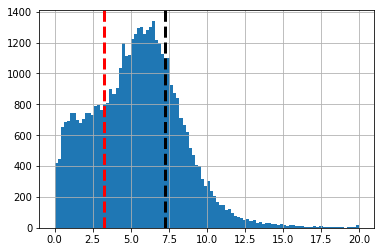

In [90]:
df_aa_one_hot['conc_cf'].hist(bins=100)
plt.axvline(df_aa_one_hot['conc_cf'].quantile(.75), color='k', linestyle='dashed', linewidth=3)
plt.axvline(df_aa_one_hot['conc_cf'].quantile(.25), color='r', linestyle='dashed', linewidth=3)

In [97]:
# identify high and low classes by conc_cf quantiles
low_cut = df_aa_one_hot['conc_cf'].quantile(0.25)
high_cut = df_aa_one_hot['conc_cf'].quantile(0.75)

low_exp_df = df_aa_one_hot[df_aa_one_hot['conc_cf'] < low_cut]
high_exp_df = df_aa_one_hot[df_aa_one_hot['conc_cf'] > high_cut]

# set classes for high vs. low expression# set cl 
low_exp_df.insert(0, 'class', 0)
high_exp_df.insert(0, 'class', 1)
#doing it this was causes a warning
# low_exp_df['class'] = 0
# high_exp_df['class'] = 1

print(low_exp_df.shape, high_exp_df.shape)

aa_one_hot_highlow = pd.concat([low_exp_df,high_exp_df])


(11302, 4) (11301, 4)


In [102]:
aa_one_hot_highlow.to_hdf('aa_one_hot_highlow.h5', 'data')

C:\Users\Jay\Miniconda3\lib\site-packages\pandas\core\generic.py:1471: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['aa_one_hot']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
